<a href="https://colab.research.google.com/github/hananfarhat/DLpractice/blob/main/PneumoniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration





1. Visualize sample X-ray images



2. Understand class distribution (imbalanced data is expected)

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)



Path to dataset files: /kaggle/input/chest-xray-pneumonia


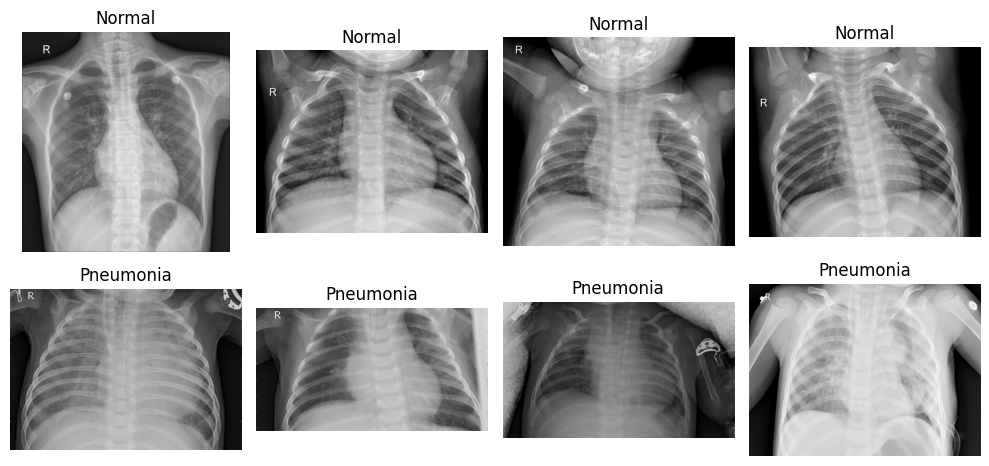

In [12]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = path

# Define paths to sample images
# This is a common structure for image datasets, adjust if needed
sample_normal_dir = os.path.join(dataset_path, 'chest_xray/train/NORMAL')
sample_pneumonia_dir = os.path.join(dataset_path, 'chest_xray/train/PNEUMONIA')

# Get a list of image files
normal_images = [os.path.join(sample_normal_dir, f) for f in os.listdir(sample_normal_dir) if os.path.isfile(os.path.join(sample_normal_dir, f))]
pneumonia_images = [os.path.join(sample_pneumonia_dir, f) for f in os.listdir(sample_pneumonia_dir) if os.path.isfile(os.path.join(sample_pneumonia_dir, f))]

# Select a few random images to display
num_samples = 4
selected_normal_images = random.sample(normal_images, min(num_samples, len(normal_images)))
selected_pneumonia_images = random.sample(pneumonia_images, min(num_samples, len(pneumonia_images)))

# Display the images
plt.figure(figsize=(10, 5))

for i, img_path in enumerate(selected_normal_images):
    img = Image.open(img_path)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title('Normal')
    plt.axis('off')

for i, img_path in enumerate(selected_pneumonia_images):
    img = Image.open(img_path)
    plt.subplot(2, num_samples, i + num_samples + 1)
    plt.imshow(img, cmap='gray')
    plt.title('Pneumonia')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
import os

# Define paths to the train, test, and validation directories
train_normal_dir = os.path.join(dataset_path, 'chest_xray/train/NORMAL')
train_pneumonia_dir = os.path.join(dataset_path, 'chest_xray/train/PNEUMONIA')
test_normal_dir = os.path.join(dataset_path, 'chest_xray/test/NORMAL')
test_pneumonia_dir = os.path.join(dataset_path, 'chest_xray/test/PNEUMONIA')
val_normal_dir = os.path.join(dataset_path, 'chest_xray/val/NORMAL')
val_pneumonia_dir = os.path.join(dataset_path, 'chest_xray/val/PNEUMONIA')


# Count the number of images in each directory
num_train_normal = len(os.listdir(train_normal_dir))
num_train_pneumonia = len(os.listdir(train_pneumonia_dir))
num_test_normal = len(os.listdir(test_normal_dir))
num_test_pneumonia = len(os.listdir(test_pneumonia_dir))
num_val_normal = len(os.listdir(val_normal_dir))
num_val_pneumonia = len(os.listdir(val_pneumonia_dir))


print(f"Number of training samples (Normal): {num_train_normal}")
print(f"Number of training samples (Pneumonia): {num_train_pneumonia}")
print(f"Number of test samples (Normal): {num_test_normal}")
print(f"Number of test samples (Pneumonia): {num_test_pneumonia}")
print(f"Number of validation samples (Normal): {num_val_normal}")
print(f"Number of validation samples (Pneumonia): {num_val_pneumonia}")

Number of training samples (Normal): 1341
Number of training samples (Pneumonia): 3875
Number of test samples (Normal): 234
Number of test samples (Pneumonia): 390
Number of validation samples (Normal): 8
Number of validation samples (Pneumonia): 8


In [14]:
import os
import random
import shutil

# Define paths to the original and new balanced directories
original_dataset_path = path
balanced_dataset_path = '/kaggle/working/chest_xray_balanced'

train_normal_dir_orig = os.path.join(original_dataset_path, 'chest_xray/train/NORMAL')
train_pneumonia_dir_orig = os.path.join(original_dataset_path, 'chest_xray/train/PNEUMONIA')
test_normal_dir_orig = os.path.join(original_dataset_path, 'chest_xray/test/NORMAL')
test_pneumonia_dir_orig = os.path.join(original_dataset_path, 'chest_xray/test/PNEUMONIA')
val_normal_dir_orig = os.path.join(original_dataset_path, 'chest_xray/val/NORMAL')
val_pneumonia_dir_orig = os.path.join(original_dataset_path, 'chest_xray/val/PNEUMONIA')

train_normal_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/train/NORMAL')
train_pneumonia_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/train/PNEUMONIA')
test_normal_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/test/NORMAL')
test_pneumonia_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/test/PNEUMONIA')
val_normal_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/val/NORMAL')
val_pneumonia_dir_balanced = os.path.join(balanced_dataset_path, 'chest_xray/val/PNEUMONIA')


# Create the new balanced directories
os.makedirs(train_normal_dir_balanced, exist_ok=True)
os.makedirs(train_pneumonia_dir_balanced, exist_ok=True)
os.makedirs(test_normal_dir_balanced, exist_ok=True)
os.makedirs(test_pneumonia_dir_balanced, exist_ok=True)
os.makedirs(val_normal_dir_balanced, exist_ok=True)
os.makedirs(val_pneumonia_dir_balanced, exist_ok=True)


# Function to balance a directory
def balance_directory(normal_dir_orig, pneumonia_dir_orig, normal_dir_balanced, pneumonia_dir_balanced):
    normal_images = [f for f in os.listdir(normal_dir_orig) if os.path.isfile(os.path.join(normal_dir_orig, f))]
    pneumonia_images = [f for f in os.listdir(pneumonia_dir_orig) if os.path.isfile(os.path.join(pneumonia_dir_orig, f))]

    min_samples = min(len(normal_images), len(pneumonia_images))

    selected_normal_images = random.sample(normal_images, min_samples)
    selected_pneumonia_images = random.sample(pneumonia_images, min_samples)

    # Copy selected images to the new balanced directories
    for img_name in selected_normal_images:
        shutil.copy(os.path.join(normal_dir_orig, img_name), os.path.join(normal_dir_balanced, img_name))

    for img_name in selected_pneumonia_images:
        shutil.copy(os.path.join(pneumonia_dir_orig, img_name), os.path.join(pneumonia_dir_balanced, img_name))

    print(f"Balanced {normal_dir_balanced} and {pneumonia_dir_balanced} with {min_samples} samples each.")


# Balance the train, test, and validation directories
balance_directory(train_normal_dir_orig, train_pneumonia_dir_orig, train_normal_dir_balanced, train_pneumonia_dir_balanced)
balance_directory(test_normal_dir_orig, test_pneumonia_dir_orig, test_normal_dir_balanced, test_pneumonia_dir_balanced)
balance_directory(val_normal_dir_orig, val_pneumonia_dir_orig, val_normal_dir_balanced, val_pneumonia_dir_balanced)

print(f"Balanced dataset created at: {balanced_dataset_path}")

Balanced /kaggle/working/chest_xray_balanced/chest_xray/train/NORMAL and /kaggle/working/chest_xray_balanced/chest_xray/train/PNEUMONIA with 1341 samples each.
Balanced /kaggle/working/chest_xray_balanced/chest_xray/test/NORMAL and /kaggle/working/chest_xray_balanced/chest_xray/test/PNEUMONIA with 234 samples each.
Balanced /kaggle/working/chest_xray_balanced/chest_xray/val/NORMAL and /kaggle/working/chest_xray_balanced/chest_xray/val/PNEUMONIA with 8 samples each.
Balanced dataset created at: /kaggle/working/chest_xray_balanced


In [15]:
from PIL import Image

if selected_normal_images:
    img = Image.open(selected_normal_images[0])
    print(f"Image size: {img.size}")
else:
    print("No normal images found to display size.")

Image size: (1767, 1869)


Data Preprocessing





Resize images (e.g., to 150x150 or 224x224)



Normalize pixel values



Apply data augmentation to balance the dataset and prevent overfitting

In [16]:
import os
from PIL import Image

balanced_dataset_path = '/kaggle/working/chest_xray_balanced'
resized_dataset_path = '/kaggle/working/chest_xray_resized'
image_size = (124, 124)

# Create the new resized directories
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/train/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/train/PNEUMONIA'), exist_ok=True)
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/test/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/test/PNEUMONIA'), exist_ok=True)
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/val/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(resized_dataset_path, 'chest_xray/val/PNEUMONIA'), exist_ok=True)


# Function to resize images in a directory
def resize_images_in_directory(input_dir, output_dir, size):
    for filename in os.listdir(input_dir):
        if os.path.isfile(os.path.join(input_dir, filename)):
            try:
                img = Image.open(os.path.join(input_dir, filename))
                img_resized = img.resize(size)
                img_resized.save(os.path.join(output_dir, filename))
            except Exception as e:
                print(f"Error resizing {filename}: {e}")


# Resize images in train, test, and validation directories
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/train/NORMAL'),
                           os.path.join(resized_dataset_path, 'chest_xray/train/NORMAL'), image_size)
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/train/PNEUMONIA'),
                           os.path.join(resized_dataset_path, 'chest_xray/train/PNEUMONIA'), image_size)
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/test/NORMAL'),
                           os.path.join(resized_dataset_path, 'chest_xray/test/NORMAL'), image_size)
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/test/PNEUMONIA'),
                           os.path.join(resized_dataset_path, 'chest_xray/test/PNEUMONIA'), image_size)
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/val/NORMAL'),
                           os.path.join(resized_dataset_path, 'chest_xray/val/NORMAL'), image_size)
resize_images_in_directory(os.path.join(balanced_dataset_path, 'chest_xray/val/PNEUMONIA'),
                           os.path.join(resized_dataset_path, 'chest_xray/val/PNEUMONIA'), image_size)

print(f"Resized dataset created at: {resized_dataset_path}")

Resized dataset created at: /kaggle/working/chest_xray_resized


In [17]:
import numpy as np
from PIL import Image

def normalize_image(image_path):
    """
    Normalizes the pixel values of an image to the range [0, 1].

    Args:
        image_path (str): The path to the image file.

    Returns:
        numpy.ndarray: The normalized image as a NumPy array.
    """
    img = Image.open(image_path)
    img_array = np.array(img).astype('float32')
    # Normalize to [0, 1]
    img_normalized = img_array / 255.0
    return img_normalized

In [18]:
import os
import numpy as np
from PIL import Image

resized_dataset_path = '/kaggle/working/chest_xray_resized'
normalized_dataset_path = '/kaggle/working/chest_xray_normalized'

# Create the new normalized directories
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/train/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/train/PNEUMONIA'), exist_ok=True)
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/test/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/test/PNEUMONIA'), exist_ok=True)
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/val/NORMAL'), exist_ok=True)
os.makedirs(os.path.join(normalized_dataset_path, 'chest_xray/val/PNEUMONIA'), exist_ok=True)

# Function to normalize images in a directory and save them
def normalize_and_save_images_in_directory(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if os.path.isfile(os.path.join(input_dir, filename)):
            try:
                # Use the normalize_image function defined in a previous cell
                normalized_img_array = normalize_image(os.path.join(input_dir, filename))

                # Convert normalized NumPy array back to PIL Image (optional, depending on next steps)
                # If you need to save as an image file, you might need to convert back or save the array
                # For typical deep learning pipelines, you might load directly into a framework like TensorFlow or PyTorch
                # and normalize as part of the data loading, rather than saving normalized images to disk.
                # For demonstration, we will just print a confirmation.

                # Example: Save the normalized image array as a .npy file
                np.save(os.path.join(output_dir, filename.replace('.jpeg', '.npy').replace('.png', '.npy')), normalized_img_array)


            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Define the base path for the resized dataset
resized_base_path = os.path.join(resized_dataset_path, 'chest_xray')
normalized_base_path = os.path.join(normalized_dataset_path, 'chest_xray')

# Normalize and save images in train, test, and validation directories
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'train/NORMAL'),
                                       os.path.join(normalized_base_path, 'train/NORMAL'))
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'train/PNEUMONIA'),
                                       os.path.join(normalized_base_path, 'train/PNEUMONIA'))
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'test/NORMAL'),
                                       os.path.join(normalized_base_path, 'test/NORMAL'))
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'test/PNEUMONIA'),
                                       os.path.join(normalized_base_path, 'test/PNEUMONIA'))
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'val/NORMAL'),
                                       os.path.join(normalized_base_path, 'val/NORMAL'))
normalize_and_save_images_in_directory(os.path.join(resized_base_path, 'val/PNEUMONIA'),
                                       os.path.join(normalized_base_path, 'val/PNEUMONIA'))

print(f"Normalized dataset saved as .npy files at: {normalized_dataset_path}")

Normalized dataset saved as .npy files at: /kaggle/working/chest_xray_normalized


Start with a basic CNN (Conv2D → MaxPooling → Dense layers)

In [23]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 116.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 122, 122, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,862,401 (10.92 MB)

 Trainable params: 2,862,401 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Define the path to the normalized dataset
normalized_dataset_path = '/kaggle/working/chest_xray_normalized'
train_dir = os.path.join(normalized_dataset_path, 'chest_xray/train')
test_dir = os.path.join(normalized_dataset_path, 'chest_xray/test')
val_dir = os.path.join(normalized_dataset_path, 'chest_xray/val')

# Image dimensions
img_height, img_width = 124, 124
batch_size = 32

# Data generators (loading .npy files)
# Custom generator to load .npy files
def npy_generator(directory, batch_size, target_size, class_mode):
    classes = sorted([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])
    class_indices = dict((c, i) for i, c in enumerate(classes))
    filenames = []
    labels = []
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.npy'):
                filenames.append(os.path.join(class_dir, filename))
                labels.append(class_indices[class_name])

    i = 0
    while True:
        batch_filenames = filenames[i:i + batch_size]
        batch_labels = labels[i:i + batch_size]

        batch_images = []
        for fn in batch_filenames:
            img_array = np.load(fn)
            # Ensure image has 3 channels if the model expects it
            if img_array.ndim == 2:
                img_array = np.stack((img_array,)*3, axis=-1)
            elif img_array.shape[-1] == 1:
                 img_array = np.concatenate([img_array]*3, axis=-1)

            batch_images.append(img_array)

        batch_images = np.array(batch_images)
        batch_labels = np.array(batch_labels)

        if class_mode == 'binary':
            yield batch_images, batch_labels
        else:
            yield batch_images, tf.keras.utils.to_categorical(batch_labels, num_classes=len(classes))

        i += batch_size
        if i >= len(filenames):
            i = 0 # Reset for the next epoch


train_generator = npy_generator(train_dir, batch_size, (img_height, img_width), 'binary')
test_generator = npy_generator(test_dir, batch_size, (img_height, img_width), 'binary')
val_generator = npy_generator(val_dir, batch_size, (img_height, img_width), 'binary')


# Load the MobileNetV2 model, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x) # Binary classification

# Create the new model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

# Calculate steps per epoch
num_train_samples = len([f for f in os.listdir(os.path.join(train_dir, 'NORMAL')) if f.endswith('.npy')]) + \
                    len([f for f in os.listdir(os.path.join(train_dir, 'PNEUMONIA')) if f.endswith('.npy')])
num_test_samples = len([f for f in os.listdir(os.path.join(test_dir, 'NORMAL')) if f.endswith('.npy')]) + \
                   len([f for f in os.listdir(os.path.join(test_dir, 'PNEUMONIA')) if f.endswith('.npy')])
num_val_samples = len([f for f in os.listdir(os.path.join(val_dir, 'NORMAL')) if f.endswith('.npy')]) + \
                  len([f for f in os.listdir(os.path.join(val_dir, 'PNEUMONIA')) if f.endswith('.npy')])


steps_per_epoch_train = num_train_samples // batch_size
steps_per_epoch_test = num_test_samples // batch_size
steps_per_epoch_val = num_val_samples // batch_size


# # Train the model
# history2 = model2.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch_train,
#     epochs=10,  # You can adjust the number of epochs
#     validation_data=val_generator,
#     validation_steps=steps_per_epoch_val
# )

# # Evaluate the model on the test set
# loss, accuracy = model2.evaluate(test_generator, steps=steps_per_epoch_test)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

/tmp/ipython-input-937032601.py:68: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 62, 62,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 62, 62,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 62, 62,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 62, 62,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 62, 62,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 62, 62,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 62, 62,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 62, 62,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 62, 62,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 62, 62,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 62, 62,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 63, 63,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 31, 31,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 31, 31,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 31, 31,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 31, 31,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# paused running the previous cell as it is taking a lot of time to execute


Evaluation





Accuracy, Precision, Recall, F1-score



Confusion matrix



Visualize training vs validation performance (loss & accuracy curves)

In [27]:
# Train the conventional CNN model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    epochs=10,  # You can adjust the number of epochs
    validation_data=val_generator,
    validation_steps=steps_per_epoch_val
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator, steps=steps_per_epoch_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.9098 - loss: 3.6358

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Assuming the model has been trained and test_generator and steps_per_epoch_test are defined

# Get predictions from the test set
test_labels = []
test_predictions = []

# Reset the test generator to start from the beginning
test_generator_eval = npy_generator(test_dir, batch_size, (img_height, img_width), 'binary')


for i in range(steps_per_epoch_test):
    images, labels = next(test_generator_eval)
    predictions = model.predict(images)
    test_labels.extend(labels)
    test_predictions.extend(predictions)

# Convert predictions to binary (0 or 1)
test_predictions_binary = (np.array(test_predictions) > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, test_predictions_binary)
precision = precision_score(test_labels, test_predictions_binary)
recall = recall_score(test_labels, test_predictions_binary)
f1 = f1_score(test_labels, test_predictions_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_labels and test_predictions_binary are available from the previous cell

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions_binary)

# Display the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()